In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
!pip install konlpy > /dev/null

In [2]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving movie.txt to movie (4).txt


In [3]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving film.jpg to film.jpg


In [4]:
with open(textfile) as fp:
    text = fp.read()

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
tokens = okt.nouns(text)
tokens[:10]

['넷플릭스', '로맨틱', '코미디', '영화', '추천', '편', '소개', '넷플릭스', '로맨틱', '코미디']

In [7]:
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:
        new_tokens.append(item)

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stoptext = """전 편 여름 이 오늘 인 선 생각 점 소개 첫 볼 수 우리 매 문 간단 코다 개 하나 내용
밥 작 저 그 바로 밤 준비 뭐 레미 센스 중 선정 예정 시작 금 의 요즘 요 바탕 보고 전제 정말 등급
대한 너 김종관 관 기대 해나 내사 개인 평 꼭 것 분 제 지인 무슨 어서 때 전체 벌렁 전부 기간 부터
대해 아줌마 남자 가슴 공식 어디 더 지난 이건 분류 자국 한가지 좀 한여름 장마 추천 소재 음 마음
보 랜드 혼자 드하 카 속 물씬 무더위 비교 불금 금요일 제목 약간 척 듯 녹 남녀 편의 또 기반 뒤권
플롯 게 순위 어제 심덕 진짜 처럼 리코 걸 목록 사람 여름날 공개 주말 맨 집콕 판매 눈 리지 처음 평가
누군가 역시 나눔 효도 시간 시즌 늘 호도"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['넷플릭스', '로맨틱', '코미디', '영화', '넷플릭스', '로맨틱', '코미디', '영화', '로맨틱', '코미디']

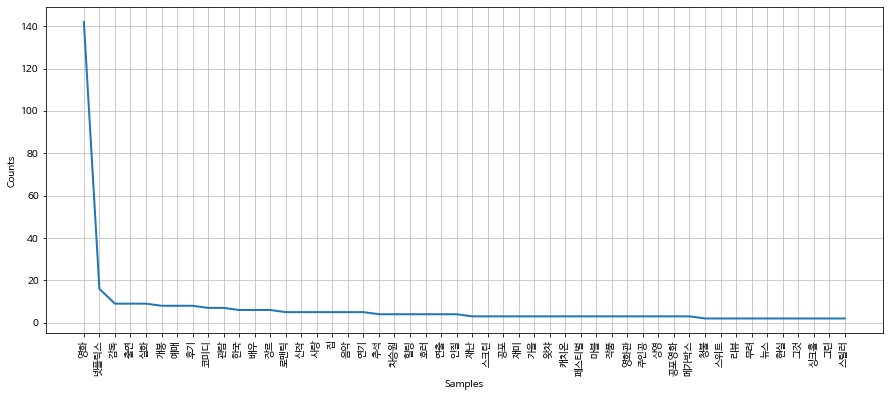

In [13]:
movie = nltk.Text(new_tokens, name='영화')
plt.figure(figsize=(15,6))
movie.plot(50)
plt.show()

In [14]:
from wordcloud import WordCloud
from PIL import Image

In [15]:
data = movie.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path=path, relative_scaling=0.2, background_color='white'
).generate_from_frequencies(dict(data))

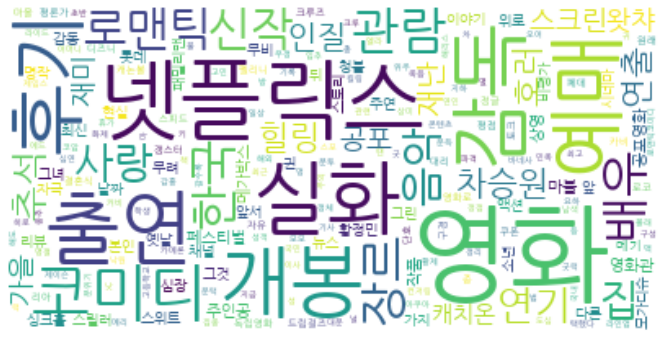

In [16]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
mask = np.array(Image.open(maskfile))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [18]:
wc = WordCloud(
    font_path=path, relative_scaling=0.2,
    background_color='white', mask=mask,
    min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

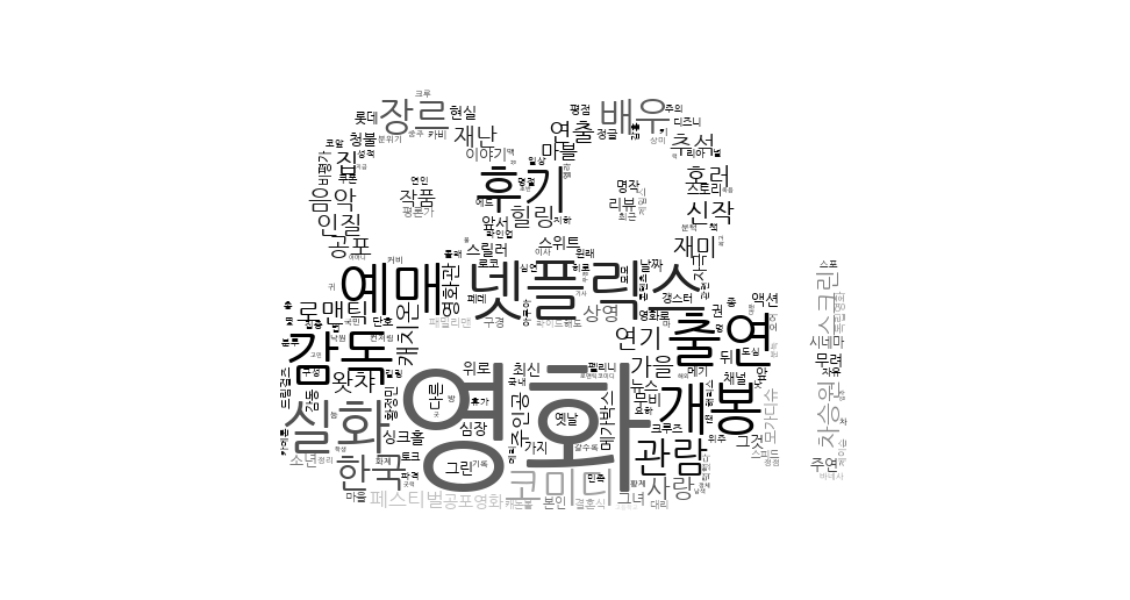

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(wc.recolor(color_func=image_colors),
           interpolation='bilinear')
plt.axis('off')
plt.show()